In [1]:
import pandas as pd

togo_data = pd.read_csv(r"C:\Users\user\Desktop\SolarPlantData.csv\togo-dapaong_qc.csv")
togo_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
print(togo_data.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [3]:
print(togo_data.isna().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [4]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(togo_data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])
togo_data['Outlier'] = (abs(z_scores) > 3).any(axis=1)

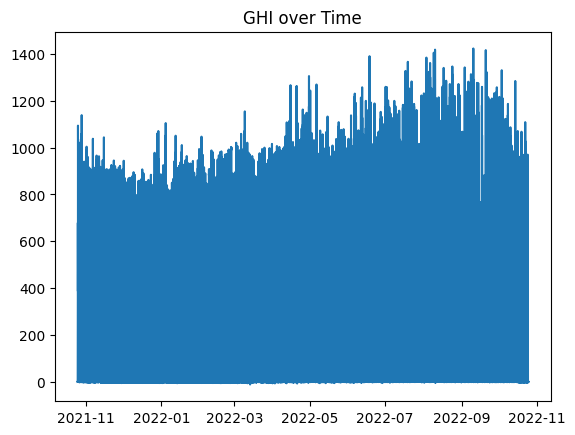

In [5]:
import matplotlib.pyplot as plt

# Plotting GHI over time
togo_data['Timestamp'] = pd.to_datetime(togo_data['Timestamp'])
plt.plot(togo_data['Timestamp'], togo_data['GHI'])
plt.title('GHI over Time')
plt.show()

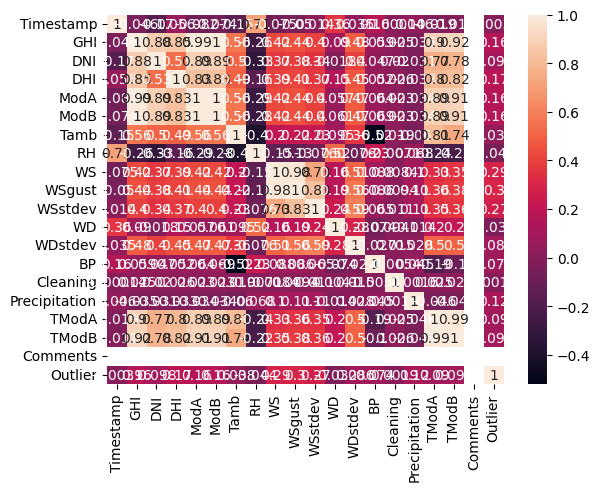

In [6]:
import seaborn as sns

# Correlation heatmap
sns.heatmap(togo_data.corr(), annot=True)
plt.show()

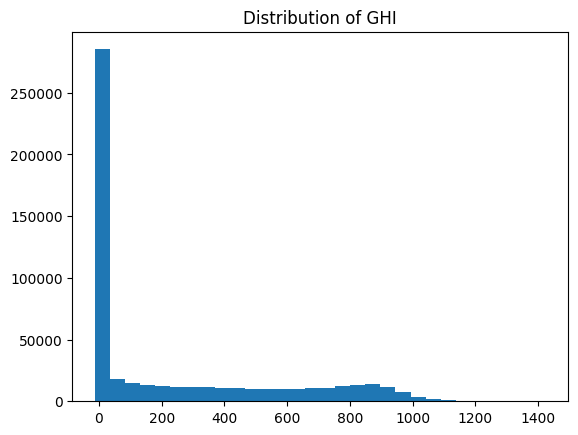

In [7]:
# Histogram for GHI
plt.hist(togo_data['GHI'], bins=30)
plt.title('Distribution of GHI')
plt.show()

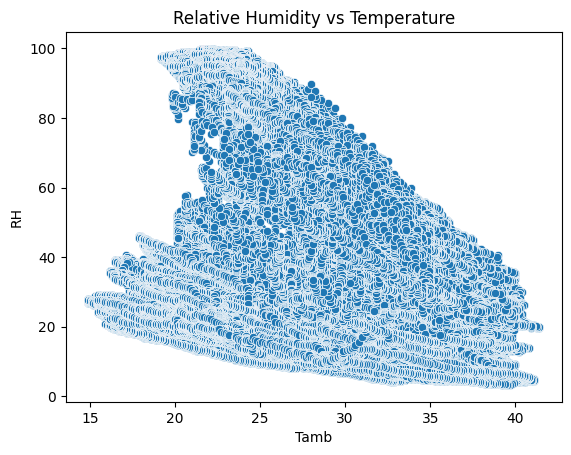

In [8]:
# Analyze RH vs. Tamb
sns.scatterplot(x=togo_data['Tamb'], y=togo_data['RH'])
plt.title('Relative Humidity vs Temperature')
plt.show()

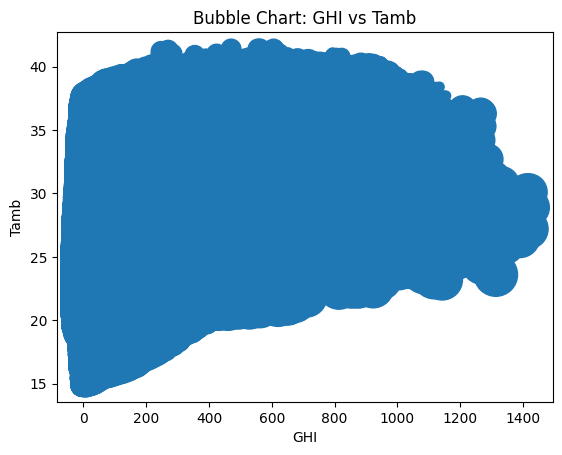

In [9]:
plt.scatter(togo_data['GHI'], togo_data['Tamb'], s=togo_data['RH'] * 10)
plt.title('Bubble Chart: GHI vs Tamb')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()